## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""


'\nYour code here\n'

In [2]:
import os
import keras

# Try to enable GPU (optional)


Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x - x.mean())/(x.max() - x.min())
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
x_train

array([[-0.24199045, -0.23022575, -0.22630418, ...,  0.00898994,
        -0.11257869, -0.19101006],
       [ 0.13055857,  0.22075465,  0.25997033, ...,  0.08742131,
         0.04820563,  0.09134288],
       [ 0.526637  ,  0.526637  ,  0.526637  , ..., -0.15963751,
        -0.1361081 , -0.14395124],
       ...,
       [-0.3361081 ,  0.22467622,  0.44820563, ..., -0.42630418,
        -0.35179437, -0.27728457],
       [ 0.26781347,  0.35408798,  0.46781347, ...,  0.29134288,
         0.27173504,  0.19722523],
       [ 0.42467622,  0.42467622,  0.4638919 , ...,  0.16585269,
         0.16585269,  0.15800955]])

In [7]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1024 ,512, 256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)                2080      
__________

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s 264us/step - loss: 1.8190 - acc: 0.3445 - val_loss: 1.6336 - val_acc: 0.4257
Epoch 2/100
50000/50000 [==============================] - 13s 251us/step - loss: 1.5497 - acc: 0.4555 - val_loss: 1.4949 - val_acc: 0.4757
Epoch 3/100
50000/50000 [==============================] - 13s 252us/step - loss: 1.3980 - acc: 0.5126 - val_loss: 1.4135 - val_acc: 0.5060
Epoch 4/100
50000/50000 [==============================] - 13s 252us/step - loss: 1.2798 - acc: 0.5512 - val_loss: 1.3986 - val_acc: 0.5099
Epoch 5/100
50000/50000 [==============================] - 13s 252us/step - loss: 1.1909 - acc: 0.5818 - val_loss: 1.3216 - val_acc: 0.5395
Epoch 6/100
50000/50000 [==============================] - 13s 254us/step - loss: 1.0899 - acc: 0.6176 - val_loss: 1.3598 - val_acc: 0.5329
Epoch 7/100
50000/50000 [==============================] - 13s 256us/step - loss: 0.9982 - acc: 0.6509 - val_l

Epoch 59/100
50000/50000 [==============================] - 13s 258us/step - loss: 0.0759 - acc: 0.9762 - val_loss: 3.2534 - val_acc: 0.5444
Epoch 60/100
50000/50000 [==============================] - 13s 263us/step - loss: 0.0722 - acc: 0.9773 - val_loss: 3.3067 - val_acc: 0.5455
Epoch 61/100
50000/50000 [==============================] - 13s 258us/step - loss: 0.0666 - acc: 0.9794 - val_loss: 3.2854 - val_acc: 0.5441
Epoch 62/100
50000/50000 [==============================] - 13s 258us/step - loss: 0.0733 - acc: 0.9773 - val_loss: 3.2788 - val_acc: 0.5434
Epoch 63/100
50000/50000 [==============================] - 13s 254us/step - loss: 0.0541 - acc: 0.9831 - val_loss: 3.5434 - val_acc: 0.5463
Epoch 64/100
50000/50000 [==============================] - 13s 255us/step - loss: 0.0680 - acc: 0.9778 - val_loss: 3.2709 - val_acc: 0.5491
Epoch 65/100
50000/50000 [==============================] - 13s 256us/step - loss: 0.0558 - acc: 0.9816 - val_loss: 3.4755 - val_acc: 0.5447
Epoch 66/100


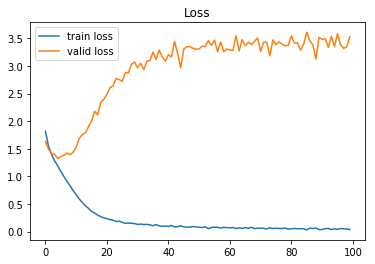

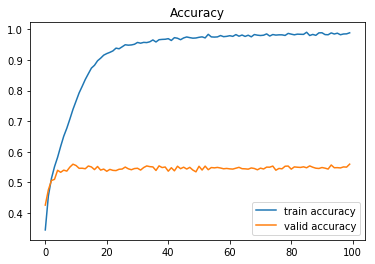

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()